In [1]:
from bokeh.io import output_notebook
from bokeh.models import BoxAnnotation
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from calc import evapotranspiration
from config import config
from data import combined_data, load_hourly, irrigation
from download import main as download
from plotting import plot_water_model
from model import Water
plt.rcParams["figure.figsize"] = (20, 5)
output_notebook()

Loading BokehJS ...

In [2]:
download(['config'])

1hour_Level2: 168 rows giving 336 observations, latest at 2021-10-12 07:00:00
1hour_Level2_maxmin: 168 rows giving 672 observations, latest at 2021-10-12 07:00:00
climat0900: 7 rows giving 56 observations, latest at 2021-10-11 09:00:00
climate_extract_cgi: 9 rows giving 7 observations, latest at 2021-10-11 09:00:00


In [3]:
annotations = [
    BoxAnnotation(left=pd.Timestamp('2021-05-03'), right=pd.Timestamp('2021-05-14'), 
                  fill_alpha=0.1, fill_color='red'),
    BoxAnnotation(left=pd.Timestamp('2021-06-19'), right=pd.Timestamp('2021-06-28'), 
                  fill_alpha=0.1, fill_color='green'),
]
data = combined_data()
plot_water_model(Water().run(data, irrigation('house')), annotations, title='house')
plot_water_model(Water().run(data, irrigation('terrace')), annotations, title='terrace')

In [4]:
data = Water().run(irrigation=irrigation('terrace'))

In [5]:
start = pd.Timestamp('2021-07-01 09:00:00')
initial = data.at[start, 'Water']
start += pd.Timedelta(days=1)
partial_irrigation = irrigation('terrace', start=start)
partial_data = Water().run(initial=initial,
                           start=start,
                           irrigation=partial_irrigation)
plot_water_model(data, 
                 left_series=[partial_data['Water'].rename('Water (partial)')],
                 right_series=[partial_data['Irrigation'].rename('Irrigation (partial)'),
                               partial_data['Evapotranspiration'].rename('ET (partial)'),
                               partial_data['Rain'].rename('Rain (partial)')])

<AxesSubplot:xlabel='timestamp'>

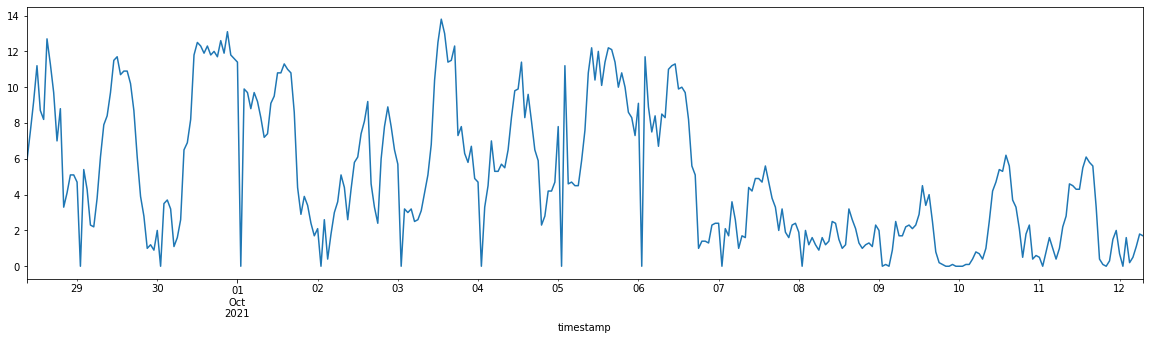

In [6]:
hourly = load_hourly()
hourly['U2run_der'].diff().clip(lower=0)[pd.Timestamp.now()-pd.Timedelta(14, 'D'):].plot()

In [7]:
data = combined_data()

<AxesSubplot:xlabel='timestamp'>

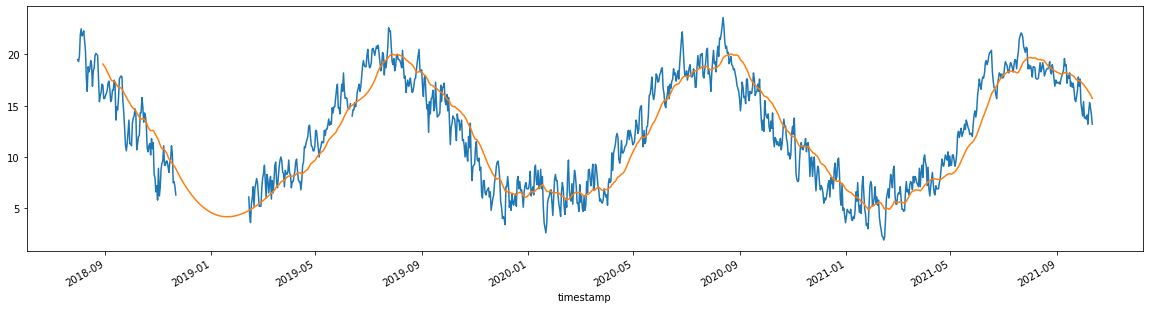

In [8]:
data['TSoil5_09'].plot()
data['TSoil5_09'].rolling(30).mean().interpolate(method='polynomial', order=3).plot()

<AxesSubplot:xlabel='timestamp'>

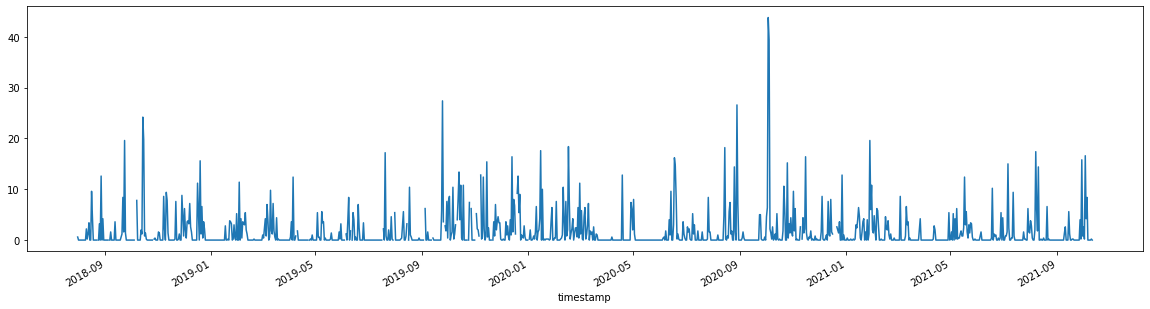

In [9]:
data['Rain_accum_0909'].plot()

<AxesSubplot:xlabel='timestamp'>

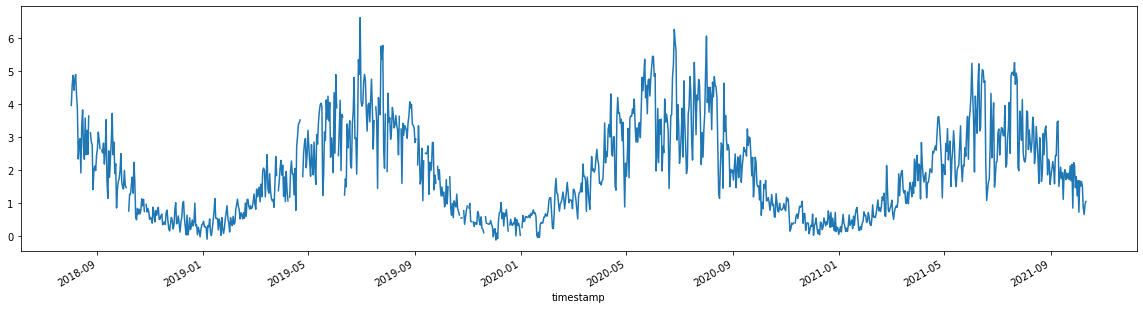

In [10]:
ET = evapotranspiration(data)
ET.plot()